Langkah 1 - Import Library

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Langkah 2 - Load Data dan Visualisasi

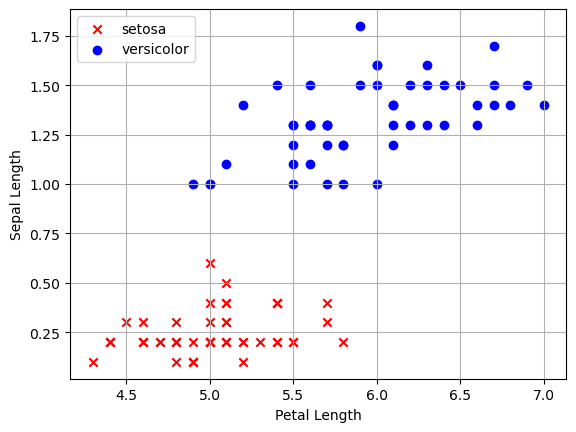

In [19]:
df = pd.read_csv('iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='x', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='o', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

1. Baris 'kode df = pd.read_csv('iris.csv', header=None)' digunakan untuk membaca dataset Iris dari file CSV dan menyimpannya ke dalam variabel df. Parameter header=None menunjukkan bahwa baris pertama dari file CSV adalah header dan tidak perlu dibaca.

2. Tiga baris kode :
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virgini']
 digunakan untuk membuat tiga variabel baru, yaitu setosa, versicolor, dan virginica, yang masing-masing berisi data dari bunga Iris spesies setosa, versicolor, dan virginica.

3. 'a, b = 0, 3' Kode ini digunakan untuk menetapkan nilai awal untuk variabel a dan b, yang masing-masing mewakili sumbu x dan sumbu y dari plot.

4. plt.scatter(setosa[a], setosa[b], color='red', marker='x', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='o', label='versicolor') Kode ini digunakan untuk membuat plot scatter untuk bunga Iris spesies setosa dan versicolor. Parameter color dan marker digunakan untuk mengatur warna dan bentuk dari titik-titik data pada plot.

5. plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
Kode ini digunakan untuk memeberi label pada sumbu x dan y dari plot

6. 'plt.legend(loc='upper left')' Kode ini digunakan untuk menambahkan legenda ke plot, yang menunjukkan warna dan bentuk dari titik-titik data untuk masing-masing spesies bunga Iris.

7. 'plt.grid()' Kode ini digunakan untuk menambahkan grid ke plot, yang dapat membantu untuk memudahkan pembacaan plot.

8. 'plt.show()' Kode ini digunakan untuk menampilkan plot.


**Langkah 3 - Membuat Kelas Perceptron**

In [20]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

1. Baris kode pertama mendefinisikan kelas Perceptron dengan dua parameter, yaitu eta dan n_iter. Parameter eta adalah learning rate, yang menentukan seberapa cepat model Perceptron akan belajar. Parameter n_iter adalah jumlah iterasi, yang menentukan berapa kali model Perceptron akan melatih dirinya sendiri dengan data pelatihan.

2.  'def fit(self, X, y):' fit() digunakan untuk melatih model Perceptron dengan data pelatihan. Parameter X adalah data pelatihan, dan parameter y adalah label kelas dari data pelatihan.

3. 'self.w_ = np.zeros(1 + X.shape[1])
    self.errors_ = []'
fit() menginisialisasi bobot (weights) model Perceptron dengan nilai nol. Bobot ini akan diperbarui selama proses pelatihan. Baris kode kedua menginisialisasi variabel errors_, yang akan digunakan untuk menyimpan jumlah kesalahan yang dibuat oleh model Perceptron pada setiap iterasi.

4. 'for _ in range(self.n_iter):' Baris kode ini memulai loop for yang akan dijalankan selama n_iter kali.

5. 

**Langkah 4 - Pilih Data dan Encoding Label**

In [21]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

1. 'y = df.iloc[0:100, 4].values' Kode ini menggunakan fungsi iloc() untuk mengambil 100 data awal dari dataset Iris berdasarkan kolom ke-4. Kolom ke-4 dari dataset Iris berisi label kelas.

2. 'y = np.where(y == 'Iris-setosa', -1, 1)' Kode ini menggunakan fungsi np.where() untuk mengubah coding label. Label "Iris-setosa" akan diubah menjadi -1, dan label "Iris-versicolor" atau "Iris-virginica" akan diubah menjadi 1.

3. 'X = df.iloc[0:100, [0, 3]].values' Kode ini menggunakan fungsi iloc() untuk memotong data latih untuk menggunakan kolom ke-0 dan ke-3. Kolom ke-0 dari dataset Iris berisi panjang sepal, dan kolom ke-3 berisi lebar sepal.

**Langkah 5 - Fitting Model**

In [24]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

1. 'ppn = Perceptron(eta=0.1, n_iter=10)' Kode ini menggunakan kelas Perceptron() dari library sklearn.linear_model untuk membuat model perceptron. Parameter eta menentukan ukuran langkah pembelajaran, dan parameter n_iter menentukan jumlah iterasi pelatihan.

2. 'ppn.fit(X, y)' Kode ini menggunakan fungsi fit() untuk melatih model perceptron pada data latih X dan y. Data latih X berisi fitur-fitur, dan data target y berisi label kelas.

**Langkah 6 - Visualisasi Nilai Error Per Epoch**

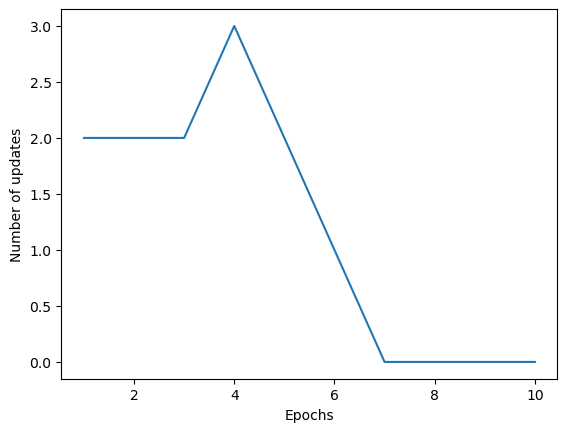

In [25]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

1. 'plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)' digunakan untuk memplot grafik kesalahan pada sumbu x dan y.

2. 'plt.xlabel('Epochs')' digunakan untuk memberi label sumbu x aebagai Epochs. Dan 'plt.ylabel('Number of updates')' digunakan untuk memberi label sumbu y sebagai Number of updates

3. plt.show() digunakan untuk menampilkan grafik

**Langkah 6 - Visualisasi Nilai Error Per Epoch**

C:\Users\hp\AppData\Local\Temp\ipykernel_15628\2281503725.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


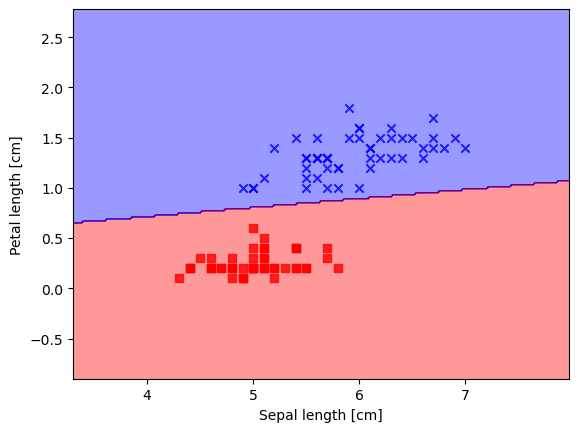

In [33]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)
        
plot_decision_regions(X, y, ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.show()

1. 'from matplotlib.colors import ListedColormap' Mengimpor library matplotlib.colors untuk menggunakan kelas ListedColormap.

2. 'def plot_decision_regions(X, y, classifier, resolution=0.02):' Mendeklarasikan fungsi plot_decision_regions() dengan parameter X, y, classifier, dan resolution. Parameter X adalah data latih, y adalah label kelas, classifier adalah model klasifikasi, dan resolution adalah resolusi grafik.

3. 'markers = ('s', 'x', 'o', '^', 'v')' Membuat array markers yang berisi daftar marker untuk memplot data latih.

4. 'colors = ('r', 'b', 'g', 'k', 'grey')' Membuat array colors yang berisi daftar warna untuk memplot data latih.

4. 'cmap = ListedColormap(colors[:len(np.unique(y))])' Membuat objek cmap dari kelas ListedColormap dengan menggunakan array colors.

5. ' x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1' Mendapatkan nilai minimum dan maksimum dari kolom ke-0 dan ke-1 data latih.

6. ' xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))' Membuat array xx1 dan xx2 yang berisi grid data untuk memplot decision region.

7. 'Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)' Menggunakan metode predict() dari model klasifikasi untuk memprediksi label kelas dari grid data xx1 dan xx2.

8. 'Z = Z.reshape(xx1.shape)' Mereshape array Z menjadi bentuk yang sama dengan array xx1 dan xx2.

9. Menggunakan fungsi plt.contourf() untuk memplot decision region dengan menggunakan array xx1, xx2, dan Z.

10. 'plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())' Mengatur batas sumbu x dan y dari grafik.

11. Membuat loop for untuk memplot data latih dengan berbagai warna dan marker yang sesuai dengan label kelas.

12. Memanggil fungsi plot_decision_regions() dengan parameter X, y, dan ppn.

13. 'plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')' Memberi label sumbu x dan y dari grafik.

14. 'plt.show()' Menampilkan grafik.